In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import networkx as nx

In [4]:
data = pd.read_csv("KKI_0050822_rois_ho.1D", sep='\t', header=None) #Read in data, need to establish data pipeline
headers = data.iloc[0, 0:].values #Get the brain regions
data.columns = headers #Turn the regions into headers
data = data.drop(0) #remove as a row
data = data.apply(pd.to_numeric, errors='coerce') #convert numbers to floats
data.head()

,#10,#11,#12,#13,#17,#18,#26,#49,#50,#51,...,#4401,#4402,#4501,#4502,#4601,#4602,#4701,#4702,#4801,#4802
1,-3.455833,7.079868,0.219103,-3.740811,1.457845,20.327837,2.250532,-2.230461,1.605708,1.977645,...,1.442805,-8.735539,-8.625860,-2.657565,-8.221482,-13.906598,5.012702,-6.730192,10.047017,-3.904391
2,-2.469324,5.448121,-4.555951,-3.637489,6.445382,38.533561,-8.440729,4.864738,-8.100010,3.122325,...,-1.647060,-15.750107,-16.121547,-9.816539,-9.255657,-17.886253,21.396816,9.316510,25.082578,4.252252
3,7.219222,-1.436616,-6.273623,2.854083,14.498095,39.630573,-17.958101,9.898834,-15.888356,1.033775,...,-4.079707,-3.453996,-10.934724,-2.153820,0.599907,-2.596380,9.750838,21.294978,10.218742,0.999258
4,9.972739,-2.179992,1.089413,4.075878,16.683466,22.034574,-19.121176,3.043617,-9.798537,0.196179,...,11.089447,23.596550,5.376220,12.166492,13.327601,13.655124,-29.213893,-5.407686,-17.903594,-10.780617
5,0.103735,7.746435,14.346825,-4.027197,4.838007,-0.399545,-5.516782,-5.106882,4.531884,4.505091,...,33.610892,40.456391,19.646428,17.572067,16.659343,11.946754,-59.611363,-47.551894,-32.661777,-22.514827


Text(0, 0.5, 'Signal')

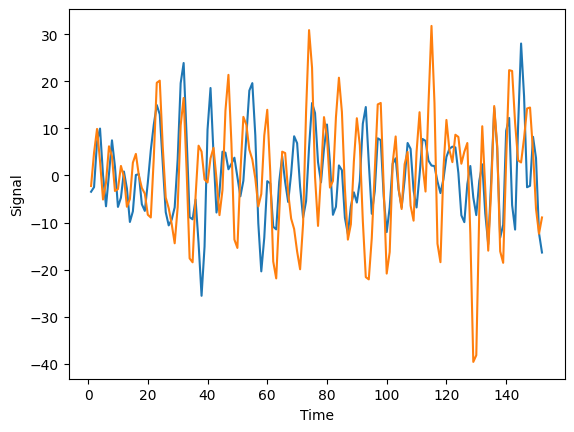

In [5]:
#Region to Region Expression
sns.lineplot(x=data.index, y=data['#10'])
sns.lineplot(x=data.index, y=data['#49'])
plt.xlabel('Time')
plt.ylabel('Signal')


Text(0.5, 1.0, 'Correlation Matrix of Brain Regions')

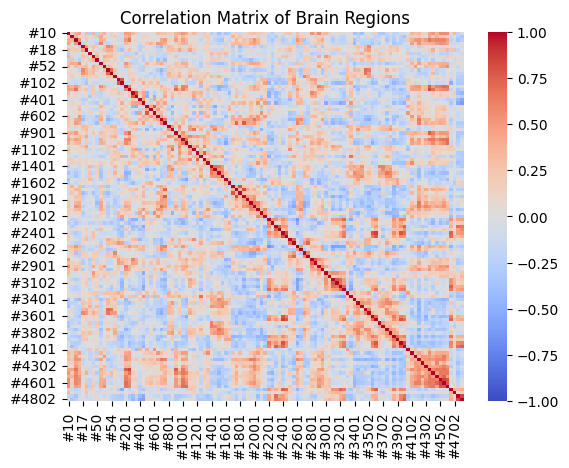

In [6]:
#Map of possible brain region connection by pearson correlation coefficient mapped region to region
corr_matrix = data.corr()  # may not be best metric to test against, research was dense so little unclear, requires further analysis
corr_matrix.head()
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Brain Regions')

In [34]:
edges = corr_matrix.stack().reset_index()

edges.rename(columns={'level_0':'regionA','level_1':'regionB',0:'Corr'},inplace=True)
edges.head()



,regionA,regionB,Corr
0,#10,#10,1.000000
1,#10,#11,0.124455
2,#10,#12,0.382589
3,#10,#13,0.454872
4,#10,#17,-0.060796


In [47]:
threshold = 0.5

edges = edges.loc[(edges['Corr'] >= threshold) & (edges['regionA'] != edges['regionB'])]

edges.head()

,regionA,regionB,Corr
1569,#101,#102,0.783947
1679,#102,#101,0.783947
1877,#201,#4401,0.753738
1988,#202,#4401,0.821031
2017,#301,#302,0.783449


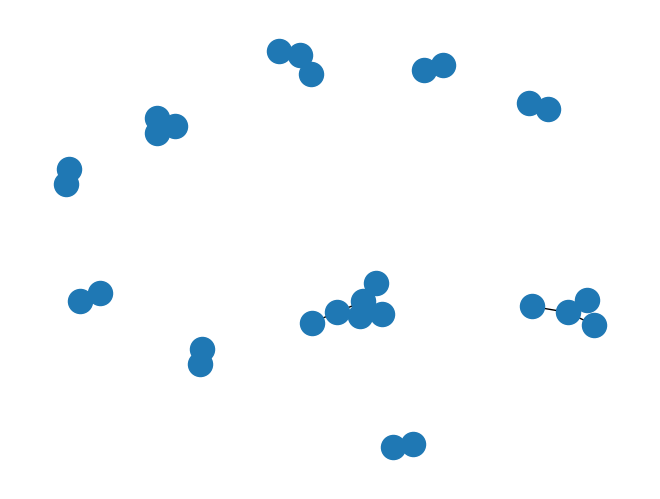

In [ ]:
adj_matrix = nx.from_pandas_edgelist(edges,'regionA','regionB',edge_attr='Corr')


nx.draw(adj_matrix)

In [50]:
subnets = list(nx.connected_components(adj_matrix))
print(subnets)

[{'#102', '#101'}, {'#201', '#901', '#202', '#4401'}, {'#302', '#301'}, {'#601', '#501'}, {'#1702', '#1802', '#702'}, {'#1701', '#1801'}, {'#4001', '#2402', '#2401', '#3602', '#3601', '#4002'}, {'#3102', '#3101'}, {'#4602', '#4502', '#4601'}, {'#4801', '#4802'}]
